# Starbucks Capstone Challenge - Exploratory Data Analysis

## Setup

In [1]:
import sys

!{sys.executable} -m pip install -e ../

Obtaining file:///C:/Users/netxph/Projects/sb-capstone
  Attempting uninstall: sb-capstone
    Found existing installation: sb-capstone 0.1.0
    Uninstalling sb-capstone-0.1.0:
      Successfully uninstalled sb-capstone-0.1.0
  Running setup.py develop for sb-capstone


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sb_capstone.wrangling import (
    clean_portfolio, 
    clean_profile, 
    clean_transcript,
    ChannelType
)

%matplotlib inline

In [3]:
portfolio = pd.read_csv("../data/processed/portfolio.csv")
portfolio = clean_portfolio(portfolio)
portfolio.head()

,id,offer_type,channels,reward,difficulty,duration
0,1,bogo,"[email, mobile, social]",10,10,7
1,2,bogo,"[web, email, mobile, social]",10,10,5
2,3,informational,"[web, email, mobile]",0,0,4
3,4,bogo,"[web, email, mobile]",5,5,7
4,5,discount,"[web, email]",5,20,10


In [4]:
profile = pd.read_csv("../data/processed/profile.csv")
profile = clean_profile(profile)
profile.head()

,id,gender,age,income,became_member_on
0,1,NaN,NaN,NaN,2017-02-12
1,2,F,55.0,112000.0,2017-07-15
2,3,NaN,NaN,NaN,2018-07-12
3,4,F,75.0,100000.0,2017-05-09
4,5,NaN,NaN,NaN,2017-08-04


In [5]:
transcript = pd.read_csv("../data/processed/transcript.csv")
transcript = clean_transcript(transcript)
transcript.head()

,person_id,event,time,offer_id,amount,reward
0,4,offer_received,0,4,NaN,NaN
1,4,offer_viewed,6,4,NaN,NaN
2,4,transaction,132,0,19.89,NaN
3,4,offer_completed,132,4,NaN,5.0
4,4,transaction,144,0,17.78,NaN


## Data Analysis

### Understand Portfolio Table

The `portfolio` table contains the offers and its details. This section aims to understand how it is setup and how conservative the setup are. We're going to look at if there are any relationship with regards to the rewards and difficulty with duration. We're going to see as well if there are any patterns in the data.

In [6]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          10 non-null     int64   
 1   offer_type  10 non-null     category
 2   channels    10 non-null     object  
 3   reward      10 non-null     int64   
 4   difficulty  10 non-null     int64   
 5   duration    10 non-null     int64   
dtypes: category(1), int64(4), object(1)
memory usage: 670.0+ bytes


Only `10` offers made. No missing values.

Since there are only ten items. We can perform visual inspection to the whole data and observe any patterns. We sorted by `duration`, `difficulty`, and `reward`.

In [7]:
portfolio.sort_values(by=["duration", "difficulty", "reward"], ascending=False)

,id,offer_type,channels,reward,difficulty,duration
4,5,discount,"[web, email]",5,20,10
6,7,discount,"[web, email, mobile, social]",2,10,10
0,1,bogo,"[email, mobile, social]",10,10,7
9,10,discount,"[web, email, mobile]",2,10,7
5,6,discount,"[web, email, mobile, social]",3,7,7
3,4,bogo,"[web, email, mobile]",5,5,7
1,2,bogo,"[web, email, mobile, social]",10,10,5
8,9,bogo,"[web, email, mobile, social]",5,5,5
2,3,informational,"[web, email, mobile]",0,0,4
7,8,informational,"[email, mobile, social]",0,0,3


Buy-One-Get-One (`bogo`) offer has the same `reward` and difficulty. Combinations varies and a bit conservative except for `bogo`. The `portfolio` table's most expensive visually are the `bogo` offers while the cheapest ones are the `informational` types.

Next, is let's try to describe the `portfolio` table see if there are any glaring patterns.

In [8]:
portfolio.describe(include="all")

,id,offer_type,channels,reward,difficulty,duration
count,10.00000,10,10,10.000000,10.000000,10.000000
unique,NaN,3,4,NaN,NaN,NaN
top,NaN,bogo,"[web, email, mobile, social]",NaN,NaN,NaN
freq,NaN,4,4,NaN,NaN,NaN
mean,5.50000,NaN,NaN,4.200000,7.700000,6.500000
std,3.02765,NaN,NaN,3.583915,5.831905,2.321398
min,1.00000,NaN,NaN,0.000000,0.000000,3.000000
25%,3.25000,NaN,NaN,2.000000,5.000000,5.000000
50%,5.50000,NaN,NaN,4.000000,8.500000,7.000000
75%,7.75000,NaN,NaN,5.000000,10.000000,7.000000


A few notable items here:

* Rewards are up to 10 and difficulty is up to 20. Perhaps this make sense, as the price of coffee would probably on that range.
* Top channel used includes all media (`web`, `email`, `mobile`, `social`)

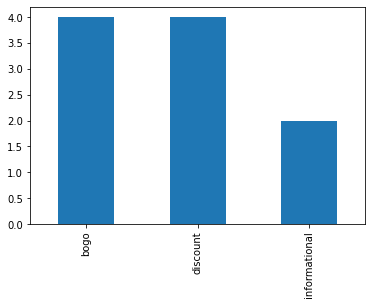

In [9]:
portfolio.offer_type.value_counts().plot(kind="bar");

Balance distribution of different offer types, 4 `bogo` and `discount` offer types and 2 `informational`.

Next we'll look at the different channels and how are they distributed.

In [10]:
portfolio.channels.explode().astype(ChannelType).value_counts()

email     10
mobile     9
web        8
social     6
Name: channels, dtype: int64

`email` and `mobile` tops the list.

### Understand Profile Table

Profile contains short description of customers under study. We'll try to understand types of customers we are trying to study.

Let's look first what data are available and some summary.

In [11]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                17000 non-null  int64         
 1   gender            14825 non-null  category      
 2   age               14825 non-null  float64       
 3   income            14825 non-null  float64       
 4   became_member_on  17000 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(2), int64(1)
memory usage: 548.1 KB


In [12]:
profile.describe(include="all", datetime_is_numeric=True)

,id,gender,age,income,became_member_on
count,17000.000000,14825,14825.000000,14825.000000,17000
unique,NaN,3,NaN,NaN,NaN
top,NaN,M,NaN,NaN,NaN
freq,NaN,8484,NaN,NaN,NaN
mean,8500.500000,NaN,54.393524,65404.991568,2017-02-23 13:12:10.164706048
min,1.000000,NaN,18.000000,30000.000000,2013-07-29 00:00:00
25%,4250.750000,NaN,42.000000,49000.000000,2016-05-26 00:00:00
50%,8500.500000,NaN,55.000000,64000.000000,2017-08-02 00:00:00
75%,12750.250000,NaN,66.000000,80000.000000,2017-12-30 00:00:00
max,17000.000000,NaN,101.000000,120000.000000,2018-07-26 00:00:00


Profile features included are `age`, `gender`, `income`, `become_member_on`. There are missing values in `gender`, `age` and `income`, and they have the same amount of missing values. Are the missing values attributed to the same customer?

In [13]:
null_profiles = profile[ \
        profile.gender.isna() & \
        profile.age.isna() & \
        profile.income.isna()] \
        [["id", "gender", "became_member_on"]] 

null_profiles.describe(datetime_is_numeric=True)

,id,became_member_on
count,2175.000000,2175
mean,8517.805517,2017-03-29 19:53:42.620689920
min,1.000000,2013-08-02 00:00:00
25%,4006.500000,2016-07-04 12:00:00
50%,8542.000000,2017-07-31 00:00:00
75%,12855.000000,2017-12-26 00:00:00
max,16995.000000,2018-07-26 00:00:00
std,4985.473324,NaN


In [14]:
missing_gender = len(profile[profile.gender.isna()])
all_missing = len(null_profiles) 

print(f"Number of customers with missing gender: {missing_gender}")
print(f"Number of customers with missing gender, age, and income: {missing_gender}")

Number of customers with missing gender: 2175
Number of customers with missing gender, age, and income: 2175


Looks like when customer has missing gender, it goes to say that age and income are also missing. We'll note this information for now. The question, is it safe to remove them? We'll try to understand further the data.

Let's look more closely at the `gender` data.

In [15]:
profile.gender.value_counts(normalize=True)

M    0.572277
F    0.413423
O    0.014300
Name: gender, dtype: float64

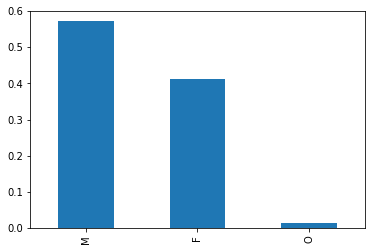

In [16]:
profile.gender.value_counts(normalize=True).plot(kind="bar");

There are more male customers (57%) than female (41%) but not that much. A bit more than 1% are unspecified.

Let's decribe the `age` data.

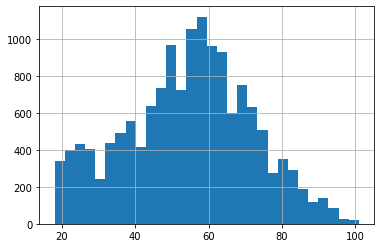

In [17]:
profile.age.hist(bins=30);

In [18]:
profile.age.mean(), profile.age.median(), profile.age.mode()[0]

(54.39352445193929, 55.0, 58.0)

Age has normal distribution (symmetrical), mostly from 50's to 60's. It's also inline with the global statistics. (https://www.statista.com/statistics/250091/coffee-drinking-consumers-in-the-us-by-age-group-2010/)

Next, we're going to look at `income`.

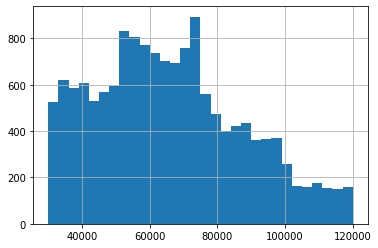

In [19]:
profile.income.hist(bins=30);

In [20]:
profile.income.mean(), profile.income.median(), profile.income.mode()[0]

(65404.9915682968, 64000.0, 73000.0)

Income distribution is right-skewed. This is true, since having Starbucks coffee appeals more to premium customers.

Next is the membership date. This is perhaps one of the important information we can focus more. Becoming a member, means we can get more customer profile and we can fine tune further our offers later.

In [21]:
profile.became_member_on.dt.year.value_counts(normalize=True)

2017    0.380529
2018    0.246941
2016    0.207412
2015    0.107647
2014    0.040647
2013    0.016824
Name: became_member_on, dtype: float64

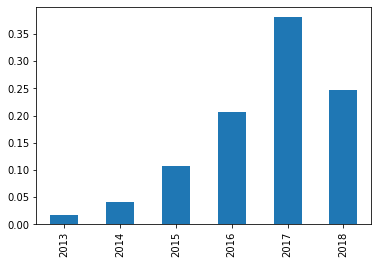

In [22]:
profile.became_member_on.dt.year.value_counts(normalize=True).sort_index(axis=0).plot(kind="bar");

In [23]:
profile.became_member_on.dt.month.value_counts(normalize=True)

8     0.094706
10    0.092235
12    0.091529
1     0.089706
9     0.089118
11    0.085235
7     0.079941
3     0.078176
4     0.077353
5     0.076882
6     0.074412
2     0.070706
Name: became_member_on, dtype: float64

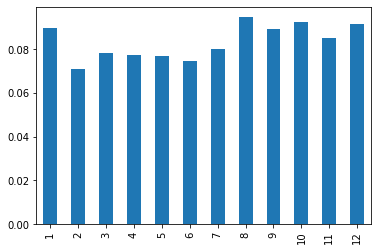

In [24]:
profile.became_member_on.dt.month.value_counts(normalize=True).sort_index(axis=0).plot(kind="bar");

Membership dates from early 2013 to mid 2018. The data did not show however, if the offer started along those dates. We'll note that for now.

Most joiners are during 2017 (38%), and we've seen membership growth trends which only dip in 2018. New joiners are distributed almost equally on different months.

### Understand Transcript Table

The transcript table will be the main table we'll be looking it. It contains offer events or normal transactions. Let's try to dissect it to gain further understanding on this table. Few things I want to understand, how are events sequenced. Also, how are the data structured per events.

In [25]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   person_id  306534 non-null  int64   
 1   event      306534 non-null  category
 2   time       306534 non-null  int64   
 3   offer_id   306534 non-null  category
 4   amount     138953 non-null  float64 
 5   reward     33579 non-null   float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 9.9 MB


In [26]:
transcript.describe(include="all")

,person_id,event,time,offer_id,amount,reward
count,306534.000000,306534,306534.000000,306534.0,138953.000000,33579.000000
unique,NaN,4,NaN,11.0,NaN,NaN
top,NaN,transaction,NaN,0.0,NaN,NaN
freq,NaN,138953,NaN,138953.0,NaN,NaN
mean,8501.102374,NaN,366.382940,NaN,12.777356,4.904137
std,4901.913992,NaN,200.326314,NaN,30.250529,2.886647
min,1.000000,NaN,0.000000,NaN,0.050000,2.000000
25%,4265.000000,NaN,186.000000,NaN,2.780000,2.000000
50%,8499.000000,NaN,408.000000,NaN,8.890000,5.000000
75%,12731.000000,NaN,528.000000,NaN,18.070000,5.000000


Here are few notable observations.

* `offer_id`, `amount` and `reward`, has different values depending on events. 
* The most top events in the data is of type `transaction`.
* Since `time` is "hours since start of test", therefore the time value here is just the timeline duration of individual test. Let's try to dig more on this later.
* Longest `time` duration for the test id 714 hours (~30 days). Average at 366 hours (~15 days).
* `amount`'s max is 1062.28, that's a big amount, let's check if it's an outlier. On the other side of spectrum, the minimum amount value is 0.05. We need more information to understand as to why.
* Most items in the transcript are of "not given offer" type (0).
* `reward` range from 2 - 10, averaging at 5.
* All in all, the event data are complete, and the missing ones are because different events have different data under `amount` and `reward`.

Let's drill down first at `event` feature.


In [27]:
transcript.event.value_counts(normalize=True)

transaction        0.453304
offer_received     0.248837
offer_viewed       0.188315
offer_completed    0.109544
Name: event, dtype: float64

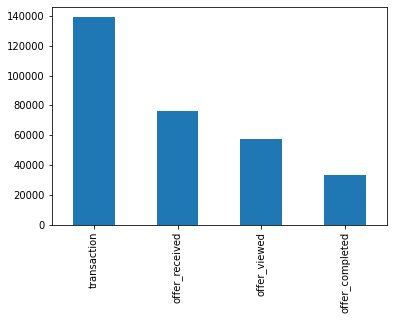

In [28]:
transcript.event.value_counts().plot(kind="bar");

In [29]:
trans_events = transcript.event \
    .apply(lambda x: False if x != "transaction" else True) 

trans_events.value_counts(normalize=True)

False    0.546696
True     0.453304
Name: event, dtype: float64

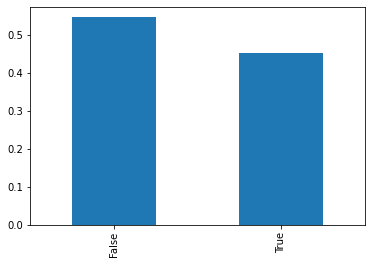

In [30]:
trans_events.value_counts(normalize=True).plot(kind="bar");

Event distribution in `transcript` table shows that `transaction` or "no offer" is still the top data at 45%. Combining offer events, they occupy 55% of the data, while not offered events is at 45%.

Next we're going to try to understand is time.

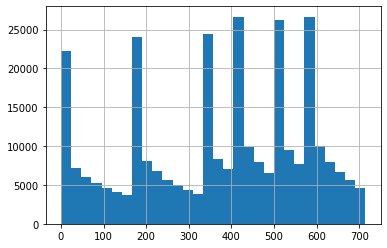

In [31]:
transcript.time.hist(bins=30);

There are some noticeable spikes in the distribution. Dividing the estimated value of the spikes, they coincide with 0, **7**, **14**, 17, **21**, 24. The **bold** ones are week timeframes. Let's take note of that for now. Also, lot of events happening on the third week.

Moving to `offer_id`.

In [32]:
transcript.offer_id.value_counts(normalize=True).sort_index(axis=0)

0     0.453304
1     0.058923
2     0.059445
3     0.038368
4     0.052855
5     0.044860
6     0.065699
7     0.066032
8     0.046667
9     0.062411
10    0.051436
Name: offer_id, dtype: float64

With large difference of `transaction` events, let's remove it to get a better view at the data.

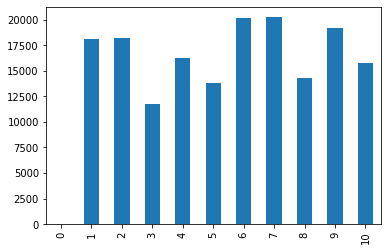

In [33]:
transcript[transcript.offer_id != 0].offer_id.value_counts().sort_index(axis=0).plot(kind="bar");

There are offers more than the others. This can be indication how consumers react to to the test or offer.

Let's move on to the `amount` and `reward`.

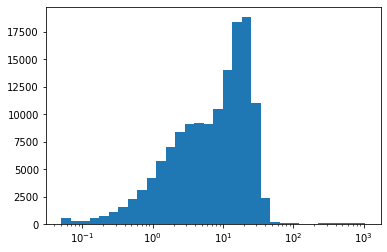

In [34]:
def plot_loghist(x, bins):
  _, bins = np.histogram(x, bins=bins)
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  plt.hist(x, bins=logbins)
  plt.xscale('log')

plot_loghist(transcript[~transcript.amount.isna()].amount, 32)

We had to create a logarithmic histogram as there are super large values that can be considered outliers. The graph is a bit left skewed distribution with its peak at approximately 10 - 50 values.

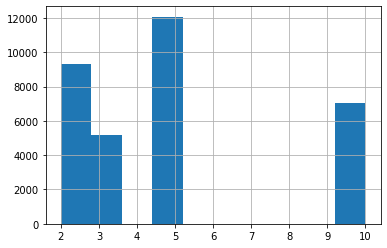

In [35]:
transcript.reward.hist();

Rewards are a bit conservative at most of them are at less than 5. The most expensive is at 10.